In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

#### Overview

In this lesson students will learn how to group data and apply multi-indexing to a DataFrame to impove the analysis and visualization of stock exchange data.

#### Class Objectives

By the end of class, students will be able to:

* Group data in a DataFrame to perform calculations on the grouped data.

* Manipulate datetime data in different formats: single variables, DataFrame columns, and series.

* Identify the calculations that can be done with datetime data.

* Declare and use a DateTimeIndex.

## Sorting 

In this part of the lesson, you will demo how to sort DataFrame values in ascending and descending order.

* `sort_values` function
    * ascending
    * descending
* `sort_index` function
    * ascending
    * descending

A DataFrame can be created from lists of dictionaries. In this example, a DataFrame of painting prices is supplied as a list of Python dictionaries, which we convert to a DataFrame.

In [8]:
# Create DataFrame
painting_df = pd.DataFrame(
    [
        {"Painting": "Mona Lisa (Knockoff)", "Price": 25, "Popularity": "Very Popular"},
        {"Painting": "Van Gogh (Knockoff)", "Price": 20, "Popularity": "Popular"},
        {"Painting": "Starving Artist", "Price": 10, "Popularity": "Average"},
        {"Painting": "Toddler Drawing", "Price": 1, "Popularity": "Not Popular"}
    ]
)
painting_df

,Painting,Price,Popularity
0,Mona Lisa (Knockoff),25,Very Popular
1,Van Gogh (Knockoff),20,Popular
2,Starving Artist,10,Average
3,Toddler Drawing,1,Not Popular


The DataFrame can be sorted by any column using `sort_values`. In this example, the DataFrame is sorted in ascending order (the default) by price.

In [9]:
# Sort ascending (default)
painting_df.sort_values("Price")

,Painting,Price,Popularity
3,Toddler Drawing,1,Not Popular
2,Starving Artist,10,Average
1,Van Gogh (Knockoff),20,Popular
0,Mona Lisa (Knockoff),25,Very Popular


The DataFrame can also be sorted in descending order using the `ascending=False` parameter.

In [10]:
# Sort descending
painting_df.sort_values("Price", ascending=False)

# Can also sort by multiple columns by passing a list of columns

,Painting,Price,Popularity
0,Mona Lisa (Knockoff),25,Very Popular
1,Van Gogh (Knockoff),20,Popular
2,Starving Artist,10,Average
3,Toddler Drawing,1,Not Popular


The DataFrame can also be sorted by the index using the `sort_index` function.

In [11]:
painting_df.sort_index(ascending=False)

,Painting,Price,Popularity
3,Toddler Drawing,1,Not Popular
2,Starving Artist,10,Average
1,Van Gogh (Knockoff),20,Popular
0,Mona Lisa (Knockoff),25,Very Popular


## Grouping

* The `groupby` function is just as common as the `sort_values` function.

* Both of these functions are used to wrangle data into a state that is usable for analysis.

* A common technique in data analysis is to summarize data by grouping similar values.
    * One example is grouping sales data by country.
    * In our case, we may want to group data by the stock ticker.
    * Once the data is grouped, a count, sum, or average can be performed on the result.

* The `groupby` function segments data into groups. Once groups are created, a function or operation can be executed against each group (e.g., addition). (Grouping allows for similar data to be aggregated or manipulated as groups).

* Data must be grouped using `groupby` before the values in each group can be aggregagted. This ensures data is aggregated at the group level rather than at the column level.

Behind the scenes, the Pandas `groupby` function does the following:
* **_Splits_** the data into groups based on certain criteria.
* **_Applies_** a function to each group independently.

To group data, use the `groupby` function against a non-unique column. The `groupby` function accepts a series name as an argument. Users can also specify a return column with brackets, [ ].

In [15]:
csv_path = Path('../data/coin_Ethereum.csv')
crypto_data = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
crypto_data

,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,
2015-08-08 23:59:00,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
2015-08-09 23:59:00,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2015-08-10 23:59:00,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
2015-08-11 23:59:00,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
2015-08-12 23:59:00,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07
...,...,...,...,...,...,...,...,...
2021-07-02 23:59:00,Monero,XMR,211.666077,199.608531,206.252403,211.345143,151943393.0,3.792466e+09
2021-07-03 23:59:00,Monero,XMR,216.327967,207.042192,211.458163,214.752778,136414129.7,3.853768e+09
2021-07-04 23:59:00,Monero,XMR,224.909012,213.023069,214.839957,219.841418,169785753.5,3.945232e+09


The `groupby` function requires a function or aggregation to proceed it.

* Whenever a function is not chained to a `groupby` function, the output will be a `DataFrameGroupBy` object rather than an actual DataFrame.

* `DataFrameGroupBy` objects must be aggregated before they can be used.

In [16]:
crypto_data_grp = crypto_data.groupby('Name')
crypto_data_grp

Examples of aggregate functions that can be applied against `DataFrameGroupBy` objects include `count()`, `sum()`, `max()`, `min()`, and `mean()`, just to name a few. These functions will proceed a `groupby` function.

In [17]:
crypto_data_mean = crypto_data.groupby('Name').mean()
crypto_data_mean

,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,
Bitcoin,382.925549,363.053732,373.323607,373.675376,2.868339e+07,5.037817e+09
Ethereum,231.411364,215.103546,223.626231,223.967431,4.505915e+09,2.300074e+10
IOTA,0.772344,0.681014,0.729461,0.729370,5.672587e+07,2.027295e+09
Litecoin,51.344396,46.931226,49.247365,49.279008,1.284851e+09,2.934139e+09
Monero,77.357637,70.481496,74.069198,74.134773,1.637467e+08,1.236534e+09
Tether,1.006776,0.995670,1.000656,1.000696,1.938397e+10,6.128741e+09


In [18]:
crypto_data.groupby('Name')['High'].mean()

Name
Bitcoin     382.925549
Ethereum    231.411364
IOTA          0.772344
Litecoin     51.344396
Monero       77.357637
Tether        1.006776
Name: High, dtype: float64

DataFrames can be grouped by more than one column. This groups values across each specified column and summarized the data into one record. <font color=red>**This approach can be used as a way to identify if there are any duplicates within the data.**</font>

In [19]:
multi_group = crypto_data.groupby(['Name', 'Symbol']).count()
multi_group

,,High,Low,Open,Close,Volume,Marketcap
Name,Symbol,,,,,,
Bitcoin,BTC,1137,1137,1137,1137,1137,1137
Ethereum,ETH,1975,1975,1975,1975,1975,1975
IOTA,MIOTA,1484,1484,1484,1484,1484,1484
Litecoin,LTC,2991,2991,2991,2991,2991,2991
Monero,XMR,2602,2602,2602,2602,2602,2602
Tether,USDT,2318,2318,2318,2318,2318,2318


In [20]:
multi_group_close = crypto_data.groupby(['Name', 'Symbol'])['Close'].mean()
multi_group_close

Name      Symbol
Bitcoin   BTC       373.675376
Ethereum  ETH       223.967431
IOTA      MIOTA       0.729370
Litecoin  LTC        49.279008
Monero    XMR        74.134773
Tether    USDT        1.000696
Name: Close, dtype: float64

In [21]:
single_group_close = crypto_data.groupby('Name')['Close'].mean()
single_group_close

Name
Bitcoin     373.675376
Ethereum    223.967431
IOTA          0.729370
Litecoin     49.279008
Monero       74.134773
Tether        1.000696
Name: Close, dtype: float64

Once data is grouped, each group can be plotted for comparison. This will plot multiple lines on a single plot. Each line is considered a subplot.

Name
Bitcoin     AxesSubplot(0.125,0.2;0.775x0.68)
Ethereum    AxesSubplot(0.125,0.2;0.775x0.68)
IOTA        AxesSubplot(0.125,0.2;0.775x0.68)
Litecoin    AxesSubplot(0.125,0.2;0.775x0.68)
Monero      AxesSubplot(0.125,0.2;0.775x0.68)
Tether      AxesSubplot(0.125,0.2;0.775x0.68)
Name: Close, dtype: object

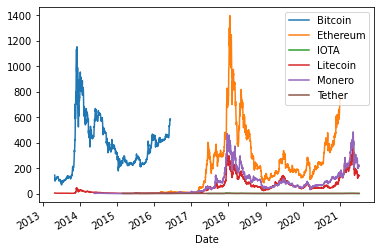

In [23]:
grouped_cryptos = crypto_data.groupby('Name')['Close'].plot(legend=True)
grouped_cryptos

When aggregating data without groups, all of the data is aggregated. Grouping and then aggregating allows calculations to be executed against groups (e.g., January's stock data would be grouped and computed separate from February's).

What are some examples of situations where data would need to be grouped and then aggregated?
* Calculating daily returns by quarter.
* Calculatiing final grades for each student per class.
* Calculating the number of horror movies released every decade between 1970 and 1990.

## Multi-Indexing

* **Multi-indexing** is the process of indexing a dataset by more than one value. Multi-indexing is like using two bookmarks in a book. Each bookmark is an index, and depending on which index you go to, you'll get different content.

* Multi-indexing is sometimes referred to as hierachical indexing, as relationships can exist between indexes. For example, a state can be one index and a city can be another. Because a city belongs to a state, these indexes would be hierarchical.

* Multiple indexes are valuable because they enable dimensional data to be grouped and retrieved.
    * This is particularly valuable when working with financial data and dates. While dates are great to index, dates do not always provide all of the detail needed to manipulate and analyze data.
    * For example, when looking at stock prices and purchases over time, it is important to group data by both date and ticker. In this operation, both date and ticker can be indexes, and by specifying date and ticker, you can slice out the price of a particular stock at a specific point in time.

* Essentially, multi-indexing imporves data storage, lookup, and manipulation/assignment.

Create and use multiple indexes, as well as how to access data using more than one index:

* When working with indexes, it is a common practice to clean data before setting indexes. For example, a Series being used as an index should not have any `NaN` values. These can be handled by first executing `dropna` against a DataFrame. The `set_index` function can then be used to set the index.

* Multi-indexing is commonly done when working with `Date` data.

* <font color=red>**When used as an index, `Date` data is considered a `DatetimeIndex`. `DatetimeIndexes` have the ability to inherently create multi-indexing.**</font>

* <font color=green>**A `DatetimeIndex` can be created by passing a `Date` field to the `index_col` attribute when using `read_csv`. `parse_dates` and `infer_datetime_format` should also be included.**</font>

In [24]:
csv_path_2 = Path("../data/AAPL.csv")
aapl_df = pd.read_csv(csv_path_2, parse_dates=True, index_col='Date', infer_datetime_format=True)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000


* `DatetimeIndexes` can be split into year, month, and day segments. The `DatetimeIndex` object includes the attributes `index.year`, `index.month`, and `index.day` for this. Passing these to a `groupby` statement will create multiple indexes based on each attribute.

**Note:** The `first` function is used to display the first value for each group within a GroupBy object. In this case, every group down to the `year`, `month`, and `day` level is unique, and therefore grabs the first and only value of every group.

**自己加:** `first()` 和 `last()` 也是两个 aggregation function.

In [25]:
# Group by year, month, and day and grab first of each group
aapl_df_grp = aapl_df.groupby([aapl_df.index.year, aapl_df.index.month, aapl_df.index.day]).first()
aapl_df_grp

Open        High         Low       Close   Adj Close  \
Date Date Date                                                               
2018 3    1      44.634998   44.945000   43.165001   43.750000   41.707802   
          2      43.200001   44.075001   43.112499   44.052502   41.996174   
          5      43.802502   44.435001   43.630001   44.205002   42.141563   
          6      44.477501   44.562500   44.032501   44.167500   42.105808   
          7      43.735001   43.962502   43.567501   43.757500   41.714939   
...                    ...         ...         ...         ...         ...   
2023 2    22    148.869995  149.949997  147.160004  148.910004  148.910004   
          23    150.089996  150.339996  147.240005  149.399994  149.399994   
          24    147.110001  147.190002  145.720001  146.710007  146.710007   
          27    147.710007  149.169998  147.449997  147.919998  147.919998   
          28    147.050003  149.080002  146.830002  147.410004  147.410004   

                   Volume  
Date Date Date             
2018 3    1     195208000  
          2     153816000  
          5     113605600  
          6      95154000  
          7     126814000  
...                   ...  
2023 2    22     51011300  
          23     48394200  
          24     55469600  
          27     44998500  
          28     50547000  

[1258 rows x 6 columns]

The `loc` function can be used to slice data from a DataFrame with multiple indexes.

* While not all indexes are required to be pased, the top level index needs to be specified (e.g., `year`).
* When all indexes are passed to the `loc` function, only one record will be returned. If fewer than all indexes are provided, more than one record of data will be output.
* Essentially, indexes must be asscessed and used hierarchically (e.g., `year` > `month` > `day`).

In [26]:
# Slice data for 4/12/2019 from first group.
aapl_df_slice = aapl_df_grp.loc[2019,4,12]
aapl_df_slice

Open         4.980000e+01
High         5.003500e+01
Low          4.905250e+01
Close        4.971750e+01
Adj Close    4.811845e+01
Volume       1.110428e+08
Name: (2019, 4, 12), dtype: float64

In [42]:
# 自己加/试：
# aapl_df_grp.loc[2018,3,5,'Open']    # 会报错
aapl_df_grp.loc[(2018,3,5), 'Open']

43.802502

In [28]:
# Slice data for April 2019
aapl_df_slice = aapl_df_grp.loc[2019,4]
aapl_df_slice

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1,47.910000,47.919998,47.095001,47.810001,46.272308,111448000
2,47.772499,48.615002,47.762501,48.505001,46.944958,91062800
3,48.312500,49.125000,48.287498,48.837502,47.266758,93087200
4,48.697498,49.092499,48.285000,48.922501,47.349030,76457200
5,49.112499,49.275002,48.982498,49.250000,47.665997,74106400
8,49.105000,50.057499,49.084999,50.025002,48.416073,103526800
9,50.080002,50.712502,49.807499,49.875000,48.270889,143072800
10,49.669998,50.185001,49.544998,50.154999,48.541889,86781200
11,50.212502,50.250000,49.610001,49.737499,48.137814,83603200


In [35]:
aapl_df_grp.loc[[2019,2020]]

Open        High         Low       Close   Adj Close  \
Date Date Date                                                               
2019 1    2      38.722500   39.712502   38.557499   39.480000   38.047047   
          3      35.994999   36.430000   35.500000   35.547501   34.257282   
          4      36.132500   37.137501   35.950001   37.064999   35.719692   
          7      37.174999   37.207500   36.474998   36.982498   35.640202   
          8      37.389999   37.955002   37.130001   37.687500   36.319603   
...                    ...         ...         ...         ...         ...   
2020 12   24    131.320007  133.460007  131.100006  131.970001  130.205780   
          28    133.990005  137.339996  133.509995  136.690002  134.862671   
          29    138.050003  138.789993  134.339996  134.869995  133.066986   
          30    135.580002  135.990005  133.399994  133.720001  131.932373   
          31    134.080002  134.740005  131.720001  132.690002  130.916153   

                   Volume  
Date Date Date             
2019 1    2     148158800  
          3     365248800  
          4     234428400  
          7     219111200  
          8     164101200  
...                   ...  
2020 12   24     54930100  
          28    124486200  
          29    121047300  
          30     96452100  
          31     99116600  

[505 rows x 6 columns]

In [45]:
# 自己加：抓取所有年份4月的data （Python Pandas slice multiindex by second level index）
aapl_df_grp.loc[(slice(None),[4]), :]

Open        High         Low       Close   Adj Close  \
Date Date Date                                                               
2018 4    2      41.660000   42.235001   41.117500   41.669998   39.724888   
          3      41.910000   42.187500   41.220001   42.097500   40.132439   
          4      41.220001   43.002499   41.192501   42.902500   40.899857   
          5      43.145000   43.557499   43.020000   43.200001   41.183464   
          6      42.742500   43.119999   42.049999   42.095001   40.130058   
...                    ...         ...         ...         ...         ...   
2022 4    25    161.119995  163.169998  158.460007  162.880005  161.899261   
          26    162.250000  162.339996  156.720001  156.800003  155.855881   
          27    155.910004  159.789993  155.380005  156.570007  155.627274   
          28    159.250000  164.520004  158.929993  163.639999  162.654678   
          29    161.839996  166.199997  157.250000  157.649994  156.700745   

                   Volume  
Date Date Date             
2018 4    2     150347200  
          3     121112000  
          4     138422000  
          5     107732800  
          6     140021200  
...                   ...  
2022 4    25     96046400  
          26     95623200  
          27     88063200  
          28    130216800  
          29    131747600  

[104 rows x 6 columns]

## Concatenating DataFrame

Introduce the topic of concatenation by explaining the following:

* Indexing, grouping, and sorting datasets are all part of data analysis preparation. Another step in this process is combining, or concatenating, datasets. This is beneficial when more than one dataset needs to be combined.

* For example, multiple months of financial records or investment data from different markets can be considered into one dataset in order to streamline and centralize data analysis.

A brief overview of concatenation:

**Concatenation** is the process of appending data from one object with another.

* <font color=red>Concatenation creates a new object that represents data from all concatenated objects.</font>

* There are multiple ways to concatenate objects, including by column and row.

* DataFrames can be joined together, or concatenated, using the Pandas `concat` function. This function enables users to join and combine more than one DataFrame.

* The `concat` function accepts the following arguments:
    * a list of DataFrames to be joined
    * the `axis` to join on (by column or row)
    * the `join` operation (inner vs. outer)
    
<font color=red>**`concat` function 是 concat by index**</font>

In [46]:
aapl_df.reset_index(inplace=True)
tsla_df = pd.read_csv('../data/TSLA_Nasdaq.csv')
crypto_df = pd.read_csv('../data/coin_Ethereum.csv')

In [47]:
print(aapl_df.shape)
aapl_df.head()

(1258, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000


In [48]:
print(tsla_df.shape)
tsla_df.head()

(1259, 6)


,Date,Close/Last,Volume,Open,High,Low
0,03/03/2023,$197.79,154193300,$194.795,$200.48,$192.88
1,03/02/2023,$190.90,181979200,$186.74,$193.7499,$186.01
2,03/01/2023,$202.77,156852800,$206.21,$207.20,$198.52
3,02/28/2023,$205.71,153144900,$210.59,$211.23,$203.75
4,02/27/2023,$207.63,161028300,$202.03,$209.42,$201.26


In [49]:
print(crypto_df.shape)
crypto_df.head()

(12507, 9)


,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,Ethereum,ETH,8/8/15 23:59,2.798810,0.714725,2.793760,0.753325,674188.0,45486894.24
1,Ethereum,ETH,8/9/15 23:59,0.879810,0.629191,0.706136,0.701897,532170.0,42399573.50
2,Ethereum,ETH,8/10/15 23:59,0.729854,0.636546,0.713989,0.708448,405283.0,42818364.39
3,Ethereum,ETH,8/11/15 23:59,1.131410,0.663235,0.708087,1.067860,1463100.0,64569288.43
4,Ethereum,ETH,8/12/15 23:59,1.289940,0.883608,1.058750,1.217440,2150620.0,73645010.99


DateFrames can be joined by either `column` or `row`. The `axis` argument can be configured to specify which one to use.

* If you need to create a dataset that reflects multiple columns from different DataFrames, the DataFrames should be joined on `column`. This will created a DataFrame that incorporated the columns from all DataFrames.
    * If you want to add more columns, then `aixs="columns"`
    
* If rows from one DataFrame simply need to be combined or added to another DataFrame, the DataFrames should be joined on `row`. Joining on the `row` axis requires the DataFrames being joined to have the same columns.
    * If you want to add more rows, then `axis="rows"`


In [50]:
pd.concat([aapl_df, tsla_df, crypto_df], axis='rows', join='inner')

,Date,Open,High,Low,Volume
0,2018-03-01 00:00:00,44.634998,44.945,43.165001,195208000.0
1,2018-03-02 00:00:00,43.200001,44.075001,43.112499,153816000.0
2,2018-03-05 00:00:00,43.802502,44.435001,43.630001,113605600.0
3,2018-03-06 00:00:00,44.477501,44.5625,44.032501,95154000.0
4,2018-03-07 00:00:00,43.735001,43.962502,43.567501,126814000.0
...,...,...,...,...,...
12502,7/2/21 23:59,206.252403,211.666077,199.608531,151943393.0
12503,7/3/21 23:59,211.458163,216.327967,207.042192,136414129.7
12504,7/4/21 23:59,214.839957,224.909012,213.023069,169785753.5
12505,7/5/21 23:59,219.961957,220.354191,206.502607,170985179.3


In [52]:
pd.concat([aapl_df, tsla_df, crypto_df], axis='rows', join='outer')

,Date,Open,High,Low,Close,Adj Close,Volume,Close/Last,Name,Symbol,Marketcap
0,2018-03-01 00:00:00,44.634998,44.945,43.165001,43.750000,41.707802,195208000.0,NaN,NaN,NaN,NaN
1,2018-03-02 00:00:00,43.200001,44.075001,43.112499,44.052502,41.996174,153816000.0,NaN,NaN,NaN,NaN
2,2018-03-05 00:00:00,43.802502,44.435001,43.630001,44.205002,42.141563,113605600.0,NaN,NaN,NaN,NaN
3,2018-03-06 00:00:00,44.477501,44.5625,44.032501,44.167500,42.105808,95154000.0,NaN,NaN,NaN,NaN
4,2018-03-07 00:00:00,43.735001,43.962502,43.567501,43.757500,41.714939,126814000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12502,7/2/21 23:59,206.252403,211.666077,199.608531,211.345143,NaN,151943393.0,NaN,Monero,XMR,3.792466e+09
12503,7/3/21 23:59,211.458163,216.327967,207.042192,214.752778,NaN,136414129.7,NaN,Monero,XMR,3.853768e+09
12504,7/4/21 23:59,214.839957,224.909012,213.023069,219.841418,NaN,169785753.5,NaN,Monero,XMR,3.945232e+09
12505,7/5/21 23:59,219.961957,220.354191,206.502607,214.464993,NaN,170985179.3,NaN,Monero,XMR,3.848898e+09


In [53]:
# Join by columns axis
pd.concat([aapl_df, tsla_df, crypto_df], axis='columns', join='inner')

,Date,Open,High,Low,Close,Adj Close,Volume,Date,Close/Last,Volume,...,Low,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000,03/03/2023,$197.79,154193300,...,$192.88,Ethereum,ETH,8/8/15 23:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000,03/02/2023,$190.90,181979200,...,$186.01,Ethereum,ETH,8/9/15 23:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600,03/01/2023,$202.77,156852800,...,$198.52,Ethereum,ETH,8/10/15 23:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000,02/28/2023,$205.71,153144900,...,$203.75,Ethereum,ETH,8/11/15 23:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000,02/27/2023,$207.63,161028300,...,$201.26,Ethereum,ETH,8/12/15 23:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2023-02-22,148.869995,149.949997,147.160004,148.910004,148.910004,51011300,03/12/2018,$23.034,123793723,...,$21.7667,Ethereum,ETH,1/12/19 23:59,128.666126,125.446757,127.528083,125.966533,2.212109e+09,1.314343e+10
1254,2023-02-23,150.089996,150.339996,147.240005,149.399994,149.399994,48394200,03/09/2018,$21.8113,82541644,...,$21.4913,Ethereum,ETH,1/13/19 23:59,126.267879,116.085966,125.907230,116.897801,2.268264e+09,1.219929e+10
1255,2023-02-24,147.110001,147.190002,145.720001,146.710007,146.710007,55469600,03/08/2018,$21.94,52715479,...,$21.7516,Ethereum,ETH,1/14/19 23:59,130.856742,116.967562,116.979096,129.068733,2.798086e+09,1.347175e+10
1256,2023-02-27,147.710007,149.169998,147.449997,147.919998,147.919998,44998500,03/07/2018,$22.1533,75029062,...,$21.4493,Ethereum,ETH,1/15/19 23:59,130.743563,120.311523,129.172691,122.032712,2.735449e+09,1.273954e+10


In [54]:
pd.concat([aapl_df, tsla_df, crypto_df], axis='columns', join='outer')

,Date,Open,High,Low,Close,Adj Close,Volume,Date,Close/Last,Volume,...,Low,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,2018-03-01,44.634998,44.945000,43.165001,43.750000,41.707802,195208000.0,03/03/2023,$197.79,154193300.0,...,$192.88,Ethereum,ETH,8/8/15 23:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2018-03-02,43.200001,44.075001,43.112499,44.052502,41.996174,153816000.0,03/02/2023,$190.90,181979200.0,...,$186.01,Ethereum,ETH,8/9/15 23:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,2018-03-05,43.802502,44.435001,43.630001,44.205002,42.141563,113605600.0,03/01/2023,$202.77,156852800.0,...,$198.52,Ethereum,ETH,8/10/15 23:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,2018-03-06,44.477501,44.562500,44.032501,44.167500,42.105808,95154000.0,02/28/2023,$205.71,153144900.0,...,$203.75,Ethereum,ETH,8/11/15 23:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,2018-03-07,43.735001,43.962502,43.567501,43.757500,41.714939,126814000.0,02/27/2023,$207.63,161028300.0,...,$201.26,Ethereum,ETH,8/12/15 23:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12502,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Monero,XMR,7/2/21 23:59,211.666077,199.608531,206.252403,211.345143,151943393.0,3.792466e+09
12503,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Monero,XMR,7/3/21 23:59,216.327967,207.042192,211.458163,214.752778,136414129.7,3.853768e+09
12504,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Monero,XMR,7/4/21 23:59,224.909012,213.023069,214.839957,219.841418,169785753.5,3.945232e+09
12505,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Monero,XMR,7/5/21 23:59,220.354191,206.502607,219.961957,214.464993,170985179.3,3.848898e+09


The `concat` function creates a new DataFrame that includes data from all datasets that were joined. The amount of data returned will depend on the type of `join` performed when concatenating.

* The `join="inner"` argument will create an intersection of the data.
* The `join="outer"` argument will union the data.

* DataFrames should be concatenated by `rows` when the columns of the DataFrame are the same and should remain the same. The idea is that the rows are appended.

* DataFrames should be concatenated by `columns` when columns from one DataFrame need to be combined with columns from another DataFrame. The idea is that the columns are appended.

In [55]:
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
tsla_df.set_index(pd.to_datetime(tsla_df['Date'], infer_datetime_format=True), inplace=True)
crypto_df.set_index(pd.to_datetime(crypto_df['Date'], infer_datetime_format=True), inplace=True)

In [56]:
pd.concat([aapl_df, tsla_df, crypto_df], axis='rows', join='inner')

,Date,Open,High,Low,Volume
Date,,,,,
2018-03-01 00:00:00,2018-03-01 00:00:00,44.634998,44.945,43.165001,195208000.0
2018-03-02 00:00:00,2018-03-02 00:00:00,43.200001,44.075001,43.112499,153816000.0
2018-03-05 00:00:00,2018-03-05 00:00:00,43.802502,44.435001,43.630001,113605600.0
2018-03-06 00:00:00,2018-03-06 00:00:00,44.477501,44.5625,44.032501,95154000.0
2018-03-07 00:00:00,2018-03-07 00:00:00,43.735001,43.962502,43.567501,126814000.0
...,...,...,...,...,...
2021-07-02 23:59:00,7/2/21 23:59,206.252403,211.666077,199.608531,151943393.0
2021-07-03 23:59:00,7/3/21 23:59,211.458163,216.327967,207.042192,136414129.7
2021-07-04 23:59:00,7/4/21 23:59,214.839957,224.909012,213.023069,169785753.5


In [68]:
# pd.concat([aapl_df, tsla_df, crypto_df], axis='columns', join='outer')

## Standard Deviation Risk

In [70]:
# Read Date
file_path = Path('../data/tech_stock_closing_value.csv')
tech_stocks = pd.read_csv(file_path, index_col='Date', parse_dates=True)
tech_stocks.head()

,AAPL,MSFT,META,GOOG,AMZN
Date,,,,,
2022-03-07,163.360001,288.529999,200.789993,131.904007,145.443497
2022-03-08,158.820007,277.799988,187.850006,126.250504,136.683502
2022-03-09,161.479996,283.440002,195.740005,131.399994,139.500000
2022-03-10,160.199997,283.019989,194.839996,131.462494,145.684998
2022-03-11,158.929993,287.959991,192.639999,133.999496,149.574493


In [71]:
# Calculate daily return
daily_return = tech_stocks.pct_change()
daily_return.head()

,AAPL,MSFT,META,GOOG,AMZN
Date,,,,,
2022-03-07,NaN,NaN,NaN,NaN,NaN
2022-03-08,-0.027791,-0.037189,-0.064445,-0.042861,-0.060230
2022-03-09,0.016748,0.020302,0.042002,0.040788,0.020606
2022-03-10,-0.007927,-0.001482,-0.004598,0.000476,0.044337
2022-03-11,-0.007928,0.017455,-0.011291,0.019298,0.026698


In [72]:
# Calculate standard deviation using "std" function
daily_std = daily_return.std()
daily_std.head()

AAPL    0.021395
MSFT    0.020947
META    0.036887
GOOG    0.022738
AMZN    0.031212
dtype: float64

In [73]:
# Sort the output from the "std" function in descending order (using "sort_values") will display the portfolios/stocks
# that have the most and least amount of risk.
daily_std.sort_values(ascending=False)

META    0.036887
AMZN    0.031212
GOOG    0.022738
AAPL    0.021395
MSFT    0.020947
dtype: float64

In [74]:
# Calculate the annualized standard deviation
# Calculating annualized standard deviation is done by multiplying the square root (sqrt) of the number of trading
# days in a year (252) with the standard deviation.
annualized_std = daily_std * np.sqrt(252)
annualized_std

AAPL    0.339642
MSFT    0.332530
META    0.585565
GOOG    0.360961
AMZN    0.495474
dtype: float64

In [75]:
# Plot standard deviation for 3 different portfolios to determine which has the most risk
portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std

,0.5,1.0,1.5
0,0.171094,-0.528918,-1.648375
1,1.672475,0.768964,1.488541
2,0.703588,-0.706731,1.143509
3,0.829468,-0.584512,-0.318436
4,0.335988,1.191440,1.286728
...,...,...,...
9995,-0.134344,-0.171644,0.698576
9996,0.498960,0.403871,-2.621878
9997,-0.288759,0.141796,-3.875705
9998,0.384626,-0.088016,0.358952


<AxesSubplot:ylabel='Frequency'>

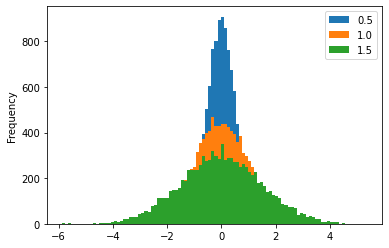

In [78]:
portfolio_std.plot.hist(stacked=False, bins=100)

<AxesSubplot:ylabel='Frequency'>

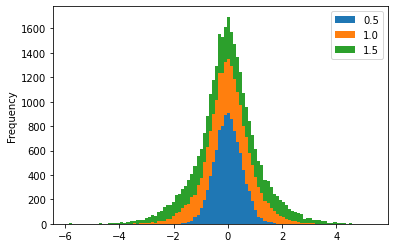

In [79]:
# 自己加：对比上面 stacked=False
portfolio_std.plot.hist(stacked=True, bins=100)

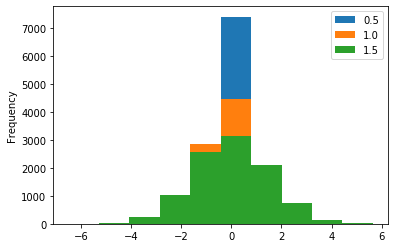

In [36]:
portfolio_std.plot.hist(stacked=False, bins=10)

<AxesSubplot:>

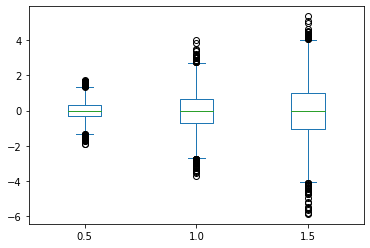

In [80]:
portfolio_std.plot.box()

<AxesSubplot:title={'center':'Plot the daily return'}>

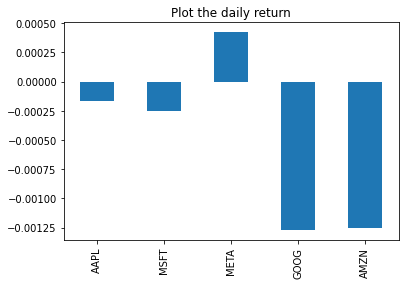

In [83]:
daily_return.mean().plot(kind='bar', title='Plot the daily return')